# Unit 5 - Financial Planning

In [215]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [216]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [217]:
# Set current amount of crypto assets
# YOUR CODE HERE!
crypto_data = {
    "shares": [1.2, 5.3]
}

# Set the tickers
tickers = ["BTC", "ETH"]

# Create the shares DataFrame with `tickers` as index
df_crypto = pd.DataFrame(crypto_data, index=tickers)

# Display shares data
df_crypto

,shares
BTC,1.2
ETH,5.3


In [218]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [219]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_response = requests.get(btc_url)
btc_price = btc_response.json()

# Fetch current ETH price
# YOUR CODE HERE!
eth_response = requests.get(eth_url)
eth_price = eth_response.json()

# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = btc_price["data"]["1"]["quotes"]["CAD"]["price"] * crypto_data["shares"][0]
my_eth_value = eth_price["data"]["1027"]["quotes"]["CAD"]["price"] * crypto_data["shares"][1]

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $75066.95
The current value of your 5.3 ETH is $27379.38


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [220]:
# Set current amount of shares
# YOUR CODE HERE!
share_data = {
    "shares": [200, 50]
}

# Set the tickers
tickers = ["AGG", "SPY"]

# Create the shares DataFrame with `tickers` as index
df_share = pd.DataFrame(share_data, index=tickers)

# Display shares data
df_share

,shares
AGG,200
SPY,50


In [221]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
#print(f"Alpaca Key type: {type(alpaca_api_key)}")
#print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [222]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2020-07-14", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
df_portfolio = alpaca.get_barset(
    tickers,
    limit = 1000,
    timeframe = "1D",
    start = today,
    end = today
).df

# Preview DataFrame
# YOUR CODE HERE!
df_portfolio = df_portfolio.dropna()
df_portfolio

AGG                                      SPY  \
                             open    high     low    close   volume   open   
time                                                                         
2020-07-14 00:00:00-04:00  118.58  118.74  118.58  118.655  3611959  313.3   

                                                          
                             high  low   close    volume  
time                                                      
2020-07-14 00:00:00-04:00  319.76  312  318.89  79292036

In [223]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price} \n")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $118.655 

Current SPY closing price: $318.89


In [224]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value = spy_close_price * df_share.loc["SPY"]["shares"]
my_agg_value = agg_close_price * df_share.loc["AGG"]["shares"]

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value} \n")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value}")

The current value of your 50 SPY shares is $15944.5 

The current value of your 200 AGG shares is $23731.0


### Savings Health Analysis

In [225]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000

# Consolidate financial assets data
#To analyze savings health, create a DataFrame called df_savings with two rows. 
#Store the total value in dollars of the 
#crypto assets in the first row and the total value of the shares in the second row.
# YOUR CODE HERE!
crypto_assets = my_btc_value + my_eth_value
shares = my_spy_value + my_agg_value

assets_data = {
    "assets": [crypto_assets, shares]
}
tickers = ["crypto", "shares"]

# Create savings DataFrame
# YOUR CODE HERE!
df_savings = pd.DataFrame(assets_data, index=tickers)

# Display savings DataFrame
display(df_savings)

,assets
crypto,102446.331996
shares,39675.500000


<AxesSubplot:title={'center':'Stocks Portfolio Composition'}, ylabel='assets'>

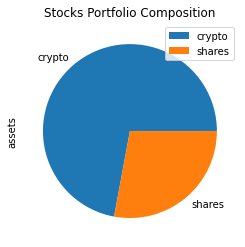

In [226]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y="assets", title="Stocks Portfolio Composition")

In [227]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = crypto_assets + shares

# Validate saving health
# YOUR CODE HERE!
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
else:
    print(f"Oh no, you are ${emergency_fund - total_savings} off to having enough in your emergency fund")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [228]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-12-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-12-01', tz='America/New_York').isoformat()

In [229]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
tickers = ["SPY", "AGG"]

df_stock_data = alpaca.get_barset(
    tickers,
    timeframe = "day",
    limit = 1000,
    start = start_date,
    end = end_date
).df

# Display sample data
df_stock_data.head()


AGG                                         SPY  \
                             open    high      low   close     volume    open   
time                                                                            
2017-12-11 00:00:00-05:00  109.29  109.32  109.130  109.13  2475019.0     NaN   
2017-12-12 00:00:00-05:00  109.07  109.11  108.950  109.10  2839614.0  266.59   
2017-12-13 00:00:00-05:00  109.23  109.55  109.135  109.41  2638160.0  267.06   
2017-12-14 00:00:00-05:00  109.31  109.51  109.230  109.45  3698172.0  267.12   
2017-12-15 00:00:00-05:00  109.42  109.55  109.315  109.47  2034072.0  265.45   

                                                                
                             high      low   close      volume  
time                                                            
2017-12-11 00:00:00-05:00     NaN      NaN     NaN         NaN  
2017-12-12 00:00:00-05:00  267.32  266.345  266.79  46482549.0  
2017-12-13 00:00:00-05:00  267.56  266.650  266.73  48961663.0  
2017-12-14 00:00:00-05:00  267.22  265.600  265.67  57343318.0  
2017-12-15 00:00:00-05:00  267.04  265.390  266.53  59269913.0

In [230]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60, .40],
    num_simulation = 500,
    num_trading_days = 252*30
)


In [231]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_dist.portfolio_data.head()

AGG                                      \
                             open    high      low   close     volume   
time                                                                    
2017-12-11 00:00:00-05:00  109.29  109.32  109.130  109.13  2475019.0   
2017-12-12 00:00:00-05:00  109.07  109.11  108.950  109.10  2839614.0   
2017-12-13 00:00:00-05:00  109.23  109.55  109.135  109.41  2638160.0   
2017-12-14 00:00:00-05:00  109.31  109.51  109.230  109.45  3698172.0   
2017-12-15 00:00:00-05:00  109.42  109.55  109.315  109.47  2034072.0   

                                           SPY                           \
                          daily_return    open    high      low   close   
time                                                                      
2017-12-11 00:00:00-05:00          NaN     NaN     NaN      NaN     NaN   
2017-12-12 00:00:00-05:00    -0.000275  266.59  267.32  266.345  266.79   
2017-12-13 00:00:00-05:00     0.002841  267.06  267.56  266.650  266.73   
2017-12-14 00:00:00-05:00     0.000366  267.12  267.22  265.600  265.67   
2017-12-15 00:00:00-05:00     0.000183  265.45  267.04  265.390  266.53   

                                                    
                               volume daily_return  
time                                                
2017-12-11 00:00:00-05:00         NaN          NaN  
2017-12-12 00:00:00-05:00  46482549.0          NaN  
2017-12-13 00:00:00-05:00  48961663.0    -0.000225  
2017-12-14 00:00:00-05:00  57343318.0    -0.003974  
2017-12-15 00:00:00-05:00  59269913.0     0.003237

In [232]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\colle\Documents\FinTech\Week5HW\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001934,0.993760,1.000583,1.010992,0.984502,1.007888,0.991301,1.001935,0.994856,1.011023,...,0.998088,0.995797,0.998168,0.994812,0.993412,1.006318,0.999848,1.001110,0.999639,1.002477
2,1.011455,0.998262,0.985105,1.005989,0.984172,1.022085,0.999533,1.001564,1.006368,1.017054,...,0.996102,0.988293,0.998921,1.003164,1.004628,1.005164,1.009554,1.007708,0.994012,1.003232
3,1.010045,0.992177,0.992586,1.002519,0.983304,1.018453,1.000751,0.998510,1.001270,1.022217,...,1.003316,0.993266,0.989798,0.999638,1.011698,0.999525,1.017497,1.007448,0.994648,1.012162
4,1.022618,0.989680,0.989243,1.002215,0.983255,1.020427,1.000961,0.996302,1.002229,1.027331,...,1.011927,0.990547,0.992041,1.003491,1.011532,1.008180,1.024528,1.005270,1.002868,1.013318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,6.242081,6.839813,12.696157,20.018658,9.795968,11.783757,4.644272,14.132135,8.298425,8.211854,...,12.647746,3.134417,5.620629,7.717741,5.216662,7.499848,13.903187,4.489370,7.424192,9.544894
7557,6.283818,6.799699,12.676621,20.096814,9.780979,11.724301,4.674293,14.263258,8.253842,8.226132,...,12.550119,3.119692,5.610275,7.768909,5.184870,7.525160,13.881867,4.453346,7.372418,9.539115
7558,6.266420,6.796593,12.643368,20.008769,9.898024,11.711479,4.681326,14.268065,8.225754,8.238135,...,12.551076,3.146583,5.615987,7.678877,5.160574,7.492041,13.868157,4.494868,7.302221,9.535031
7559,6.314137,6.770693,12.735043,19.990519,9.783319,11.671475,4.713124,14.350851,8.168908,8.269062,...,12.522269,3.142795,5.635014,7.704772,5.187919,7.486183,13.867100,4.473880,7.313408,9.642237


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

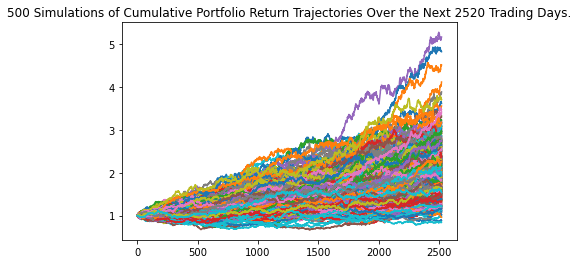

In [250]:
# Plot simulation outcomes
# YOUR CODE HERE!
MC_dist.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

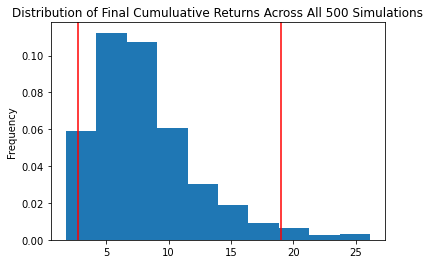

In [234]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
MC_dist.plot_distribution()

### Retirement Analysis

In [235]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
summary_stats = MC_dist.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print (summary_stats)

count           500.000000
mean              8.160470
std               4.179484
min               1.770652
25%               5.221346
50%               7.285341
75%              10.012451
max              26.154327
95% CI Lower      2.737385
95% CI Upper     18.985214
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [236]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(summary_stats[8]*20000,2)
ci_upper = round(summary_stats[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $54747.7 and $379704.28


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [237]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(summary_stats[8]*initial_investment,2)
ci_upper = round(summary_stats[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $82121.56 and $569556.43


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [238]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60, .40],
    num_simulation = 500,
    num_trading_days = 252*5
)


In [239]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\colle\Documents\FinTech\Week5HW\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996991,1.005224,0.997133,0.997842,1.004807,0.996192,1.002898,0.998758,0.989723,1.003657,...,0.988272,1.010043,0.999322,0.988429,0.992388,1.009923,0.997540,1.002600,0.999906,1.001439
2,0.999361,1.008680,0.987727,1.003665,1.014114,0.990482,1.002379,1.000307,0.996051,1.006512,...,0.991201,1.020293,0.997297,0.995286,0.981400,1.006325,1.001613,1.008937,0.996111,0.998789
3,1.001079,1.006987,0.992018,1.009497,1.018404,1.000911,0.996300,1.004065,0.993585,1.004673,...,0.994476,1.028265,0.994683,0.993974,0.971966,1.003753,1.005412,1.006751,0.999296,0.991514
4,0.999874,1.000658,0.986520,1.015195,1.008626,1.000588,0.994605,1.009257,0.994374,1.014600,...,0.987822,1.024210,0.992170,0.996938,0.965537,0.998355,1.008794,1.013898,0.994351,0.991885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.077924,1.133765,1.723955,1.520410,1.088085,1.050140,1.285352,1.362341,1.008737,2.096770,...,1.314289,1.540102,1.211836,1.547817,2.063525,1.894569,1.894642,0.957137,1.544072,1.338402
1257,1.076972,1.138465,1.724178,1.519403,1.091415,1.053085,1.287852,1.361436,1.018233,2.092367,...,1.304501,1.529777,1.215859,1.559259,2.059859,1.903522,1.900685,0.957036,1.541910,1.339237
1258,1.076285,1.145524,1.724031,1.527326,1.092564,1.055438,1.280172,1.363563,1.019348,2.088573,...,1.302250,1.512498,1.226144,1.554304,2.053005,1.912428,1.884161,0.950413,1.548221,1.343011
1259,1.074664,1.142540,1.719174,1.515308,1.092958,1.054731,1.290548,1.356103,1.032812,2.084435,...,1.287699,1.511306,1.234824,1.542897,2.052495,1.914772,1.860823,0.956325,1.548209,1.326480


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

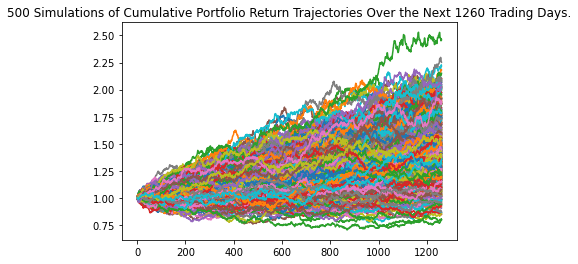

In [240]:
# Plot simulation outcomes
# YOUR CODE HERE!
MC_dist.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

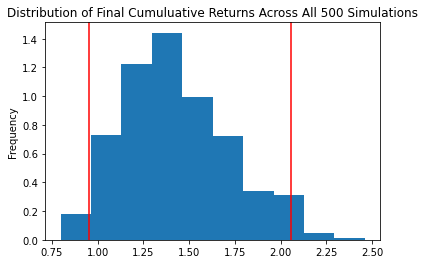

In [241]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
MC_dist.plot_distribution()

In [242]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
summary_stats = MC_dist.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(summary_stats)

count           500.000000
mean              1.428112
std               0.294067
min               0.797168
25%               1.217196
50%               1.381671
75%               1.604396
max               2.461326
95% CI Lower      0.951576
95% CI Upper      2.057768
Name: 1260, dtype: float64


In [254]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 100000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = round(summary_stats[8]*initial_investment,2)
ci_upper_five = round(summary_stats[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")


There is a 95% chance that an initial investment of $100000 in the portfolio over the next 5 years will end within in the range of $115384.98 and $317855.47


### Ten Years Retirement Option

In [255]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60, .40],
    num_simulation = 500,
    num_trading_days = 252*10
)


In [256]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\colle\Documents\FinTech\Week5HW\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994723,0.990816,1.000347,1.006284,1.000696,1.010166,0.994497,1.001495,1.000525,0.992663,...,0.995853,0.996259,0.998220,0.985596,0.994054,0.996698,0.997081,0.986311,0.995938,1.002181
2,0.988055,0.986210,0.994668,1.000018,1.001344,1.023872,0.994580,0.997340,0.996190,0.989904,...,0.986055,0.999308,1.003792,0.985009,0.995468,1.001905,0.992769,0.981071,0.995153,1.005647
3,0.990298,0.992013,1.000977,1.006176,1.006484,1.026985,0.986836,0.998911,0.986594,0.982891,...,0.985390,0.997456,0.996634,0.984862,0.992371,1.006782,0.997940,0.976727,0.988950,1.005359
4,0.996882,0.991757,1.001062,1.009338,1.013695,1.028855,0.975441,0.997183,0.984054,0.983915,...,0.989437,1.003916,0.995474,0.999641,0.993401,1.003075,0.997100,0.982928,0.978979,0.997313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.442145,1.378172,2.160244,2.121165,3.241292,1.422043,1.894744,2.224993,1.792512,2.176330,...,2.863779,2.141605,1.475560,1.930333,2.372738,1.700187,3.271463,1.429494,2.845432,1.679944
2517,2.419904,1.377805,2.172732,2.118287,3.264313,1.424502,1.929747,2.207148,1.791959,2.163696,...,2.843509,2.139206,1.451838,1.931209,2.368083,1.692374,3.264582,1.425538,2.821259,1.684685
2518,2.427466,1.358213,2.178241,2.118147,3.277916,1.418586,1.946462,2.227085,1.813029,2.172166,...,2.857989,2.140924,1.453655,1.932505,2.377478,1.682786,3.220213,1.426796,2.828366,1.699951
2519,2.428552,1.361194,2.158104,2.105274,3.311006,1.416618,1.942401,2.245369,1.832493,2.180165,...,2.867320,2.145078,1.444909,1.937147,2.373878,1.681587,3.218799,1.438568,2.823224,1.717944


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

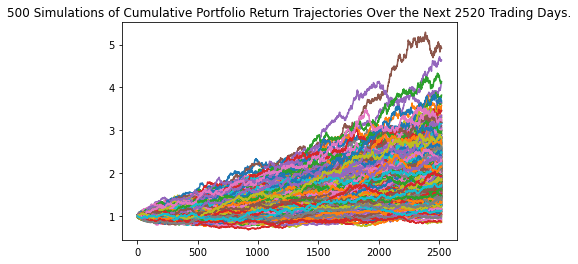

In [261]:
# Plot simulation outcomes
# YOUR CODE HERE!
MC_dist.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

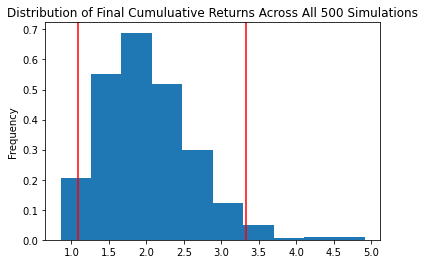

In [262]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
MC_dist.plot_distribution()

In [263]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
summary_stats = MC_dist.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(summary_stats)

count           500.000000
mean              2.013930
std               0.606376
min               0.854222
25%               1.581239
50%               1.935135
75%               2.360145
max               4.917467
95% CI Lower      1.087959
95% CI Upper      3.327310
Name: 2520, dtype: float64


In [264]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 100000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = round(summary_stats[8]*initial_investment,2)
ci_upper_ten = round(summary_stats[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")



There is a 95% chance that an initial investment of $100000 in the portfolio over the next 10 years will end within in the range of $108795.88 and $332730.97
